**Data Preparation and Preprocessing for the sparcs dataset for newborns. The files are individually downloaded but will be clubbed into a bigger dataset.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_2015 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_20250930.csv')
df_2016 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016_20250930.csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2017_20250930.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250930.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20250930.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2023_20250930.csv')


/tmp/ipython-input-4092590647.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2015 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_20250930.csv')
/tmp/ipython-input-4092590647.py:4: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2017_20250930.csv')
/tmp/ipython-input-4092590647.py:6: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('/content/drive/MyDrive/All_Sparcs_Dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20250930.csv')


In [ ]:
df_2015.shape, df_2016.shape, df_2017.shape, df_2021.shape, df_2022.shape, df_2023.shape

((227196, 34),
 (224779, 34),
 (219683, 34),
 (200794, 33),
 (198913, 33),
 (194249, 33))

In [ ]:
print('Columns for 2015 dataframe:', df_2015.columns)
print('Columns for 2016 dataframe:', df_2016.columns)
print('Columns for 2017 dataframe:', df_2017.columns)
print('Columns for 2021 dataframe:', df_2021.columns)
print('Columns for 2022 dataframe:', df_2022.columns)
print('Columns for 2023 dataframe:', df_2023.columns)

Columns for 2015 dataframe: Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')
Columns for 2016 dataframe: Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
col_mapping = {
    'CCS Diagnosis Code' : 'CCSR Diagnosis Code',
    'CCS Diagnosis Description': 'CCSR Diagnosis Description',
    'CCS Procedure Code': 'CCSR Procedure Code',
    'CCS Procedure Description': 'CCSR Procedure Description',
    'Facility Id' : 'Permanent Facility Id',
    'Health Service Area' : 'Hospital Service Area'
}

In [ ]:
df_2015.rename(columns = col_mapping, inplace = True)
df_2016.rename(columns = col_mapping, inplace = True)
df_2017.rename(columns = col_mapping, inplace=True)

In [ ]:
df_2015.drop(columns=['Abortion Edit Indicator'], inplace=True)
df_2016.drop(columns=['Abortion Edit Indicator'], inplace=True)
df_2017.drop(columns=['Abortion Edit Indicator'], inplace=True)

KeyError: "['Abortion Edit Indicator'] not found in axis"

In [ ]:
print('Columns for 2015 dataframe:', df_2015.columns)
print('Columns for 2016 dataframe:', df_2016.columns)
print('Columns for 2017 dataframe:', df_2017.columns)

Columns for 2015 dataframe: Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')
Columns for 2016 dataframe: Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facilit

In [ ]:
# Columns only in df_2016 and not in df_2021
print(set(df_2016.columns) - set(df_2021.columns))

# Columns only in df_2021 and not in df_2016
print(set(df_2021.columns) - set(df_2016.columns))

set()
set()


Finally concatenating the datasets .

In [ ]:
df = pd.concat([df_2015,df_2016, df_2017,df_2021,df_2022, df_2023], ignore_index=True, sort=False)

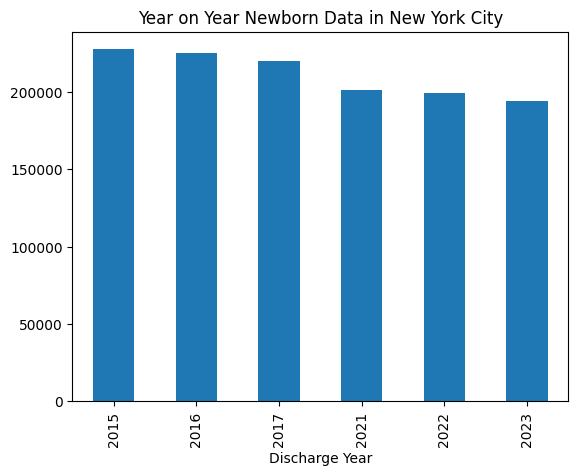

In [ ]:
# Checking Years data if merged properly
df['Discharge Year'].value_counts().plot.bar()
plt.title("Year on Year Newborn Data in New York City")
plt.show()

Clearly there is a decreasing trend for newborns in New York

In [ ]:
df.isna().sum() # checking how many missing values are there for each col

,0
Hospital Service Area,1438
Hospital County,1438
Operating Certificate Number,1438
Permanent Facility Id,1438
Facility Name,0
Age Group,0
Zip Code - 3 digits,18727
Gender,0
Race,0
Ethnicity,0


fixing the problems in the cols that have different datatypes or any other discrepancies

In [ ]:
df['CCSR Diagnosis Code'] = df['CCSR Diagnosis Code'].astype(str)

In [ ]:
df.shape

(1265614, 33)

In [ ]:
# Data type conversion , also for values 120+ marking as 120
df['Length of Stay']=df['Length of Stay'].apply(lambda x: 120 if x=='120 +' else x)
df['Length of Stay']=df["Length of Stay"].astype("int64")

In [ ]:
df['CCSR Procedure Code'] = df['CCSR Procedure Code'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265614 entries, 0 to 1265613
Data columns (total 33 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Hospital Service Area                1264176 non-null  object 
 1   Hospital County                      1264176 non-null  object 
 2   Operating Certificate Number         1264176 non-null  float64
 3   Permanent Facility Id                1264176 non-null  float64
 4   Facility Name                        1265614 non-null  object 
 5   Age Group                            1265614 non-null  object 
 6   Zip Code - 3 digits                  1246887 non-null  object 
 7   Gender                               1265614 non-null  object 
 8   Race                                 1265614 non-null  object 
 9   Ethnicity                            1265614 non-null  object 
 10  Length of Stay                       1265614 non-null  int64  
 11

Fixing birth weight column

In [ ]:
df['Birth Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1265614 entries, 0 to 1265613
Series name: Birth Weight
Non-Null Count    Dtype 
--------------    ----- 
1265309 non-null  object
dtypes: object(1)
memory usage: 9.7+ MB


In [ ]:
df['Birth Weight'].value_counts() # checking birth weight discrepancies as its creating a problem

,count
Birth Weight,
03200,54981
03300,54116
03400,52391
03100,52043
3200,49797
...,...
09800,1
07400,1
07700,1


In [ ]:
# Replacing UNKN with 0 and NAN with 0
df['Birth Weight']=df['Birth Weight'].apply(lambda x:0 if x=='UNKN' else x)
df['Birth Weight']=df['Birth Weight'].fillna('0')

In [ ]:
df['Birth Weight'].value_counts()

,count
Birth Weight,
03200,54981
03300,54116
03400,52391
03100,52043
3200,49797
...,...
09800,1
07400,1
07700,1


In [ ]:
df['Birth Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1265614 entries, 0 to 1265613
Series name: Birth Weight
Non-Null Count    Dtype
--------------    -----
1265614 non-null  int64
dtypes: int64(1)
memory usage: 9.7 MB


In [ ]:
# This one line attempts to convert everything to a number.
# 'coerce' is the key: it will automatically turn any value that CAN'T be converted
# (like 'UNKN' or any other text) into a NaN (Not a Number).
df['Birth Weight'] = pd.to_numeric(df['Birth Weight'], errors='coerce')

# Now that all bad text is gone, we just have numbers and NaNs.
# We can now safely fill the NaNs with 0.
df['Birth Weight'].fillna(0, inplace=True)

# Finally, convert the entire column to an integer type.
df['Birth Weight'] = df['Birth Weight'].astype(int)

print(f"Column is now clean! New dtype: {df['Birth Weight'].dtype}")

Column is now clean! New dtype: int64


In [ ]:
df['Birth Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1265614 entries, 0 to 1265613
Series name: Birth Weight
Non-Null Count    Dtype
--------------    -----
1265614 non-null  int64
dtypes: int64(1)
memory usage: 9.7 MB


Fixing total charges column

In [ ]:
# Converting  cost and charges to Float
df['Total Charges']=df['Total Charges'].apply(lambda x: str.replace(x,',','') if str(x).find(',') > 0 else x ).astype("float64")
df['Total Costs']=df['Total Costs'].apply(lambda x: str.replace(x,',','') if str(x).find(',') > 0 else x ).astype("float64")

In [ ]:
df['Total Charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1265614 entries, 0 to 1265613
Series name: Total Charges
Non-Null Count    Dtype  
--------------    -----  
1265614 non-null  float64
dtypes: float64(1)
memory usage: 9.7 MB


Exporting it to drive as a parquet file

In [ ]:
df.to_parquet('/content/drive/My Drive/All_Sparcs_Dataset/sparcs_all_years.parquet')

The parquet file here is the single source of truth. This file will be referred for EDA as well as model building

Now some preprocessing and some more cleanup needs to be done to get started with EDA

In [ ]:
df = pd.read_parquet('/content/drive/My Drive/All_Sparcs_Dataset/sparcs_all_years.parquet')

In [ ]:
df.shape

(1265614, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265614 entries, 0 to 1265613
Data columns (total 33 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Hospital Service Area                1264176 non-null  object 
 1   Hospital County                      1264176 non-null  object 
 2   Operating Certificate Number         1264176 non-null  float64
 3   Permanent Facility Id                1264176 non-null  float64
 4   Facility Name                        1265614 non-null  object 
 5   Age Group                            1265614 non-null  object 
 6   Zip Code - 3 digits                  1246887 non-null  object 
 7   Gender                               1265614 non-null  object 
 8   Race                                 1265614 non-null  object 
 9   Ethnicity                            1265614 non-null  object 
 10  Length of Stay                       1265614 non-null  int64  
 11

In [ ]:
df['Hospital County'].value_counts()

,count
Hospital County,
Manhattan,243731
Kings,146694
Queens,133436
Nassau,87297
Suffolk,82352
Bronx,74503
Erie,66810
Monroe,55917
Westchester,53979


In [ ]:
df['Hospital County'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1265614 entries, 0 to 1265613
Series name: Hospital County
Non-Null Count    Dtype 
--------------    ----- 
1264176 non-null  object
dtypes: object(1)
memory usage: 9.7+ MB


In [ ]:
# No. of Hospital County facility id
len(df['Permanent Facility Id'].unique())

142

In [ ]:
# No. of Hospital County facility name
len(df['Facility Name'].value_counts().unique())

186

TEchnically the no. of facility id and facility names should be same.The reason you have more facility names (186) than facility IDs (142) is because a single hospital (with one unique ID) is being recorded with several slightly different text names across the dataset.
For EDA we will drop the facility id part, but for real modelling, we will drop both

In [ ]:
#df.drop(columns=['Permanent Facility Id'], inplace=True)

In [ ]:
df.shape

(1265614, 33)

In [ ]:
#deleting all duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1232243, 33)

Dropping the cols which are not required for EDA

In [ ]:
df.drop(columns=['Payment Typology 2','Payment Typology 3'], inplace=True)

In [ ]:
df.shape

(1232243, 31)

For the same code , there are multiple descriptions. We have to make a single description for a single code

In [ ]:
# Checking Code and Description , if multiple descriptions for same code
df.groupby(['Permanent Facility Id'])['Facility Name'].nunique().sort_values(ascending=False)

,Facility Name
Permanent Facility Id,
1122.0,5
1637.0,4
511.0,3
889.0,3
1304.0,3
...,...
1740.0,1
3067.0,1
9250.0,1


Clearly facility id 1122 has 5 names, but it should have 1 name

for all codes, we will create a dictionary of descriptions and will consider the 1st description for a single code. It's a very crucial step

In [ ]:
# getting Code and Descriptions of all available fields.
# There can be similar issue of code and description differences
facility=df.groupby(['Permanent Facility Id'])['Facility Name'].unique().apply(list).to_dict()
diag=df.groupby(['CCSR Diagnosis Code'])['CCSR Diagnosis Description'].unique().apply(list).to_dict()
drg=df.groupby(['APR DRG Code'])['APR DRG Description'].unique().apply(list).to_dict()
proc=df.groupby(['CCSR Procedure Code'])['CCSR Procedure Description'].unique().apply(list).to_dict()
ill=df.groupby(['APR Severity of Illness Code'])['APR Severity of Illness Description'].unique().apply(list).to_dict()

In [ ]:
# Checking facility Code and Desc
facility

{1.0: ['Albany Medical Center Hospital'],
 5.0: ['St Peters Hospital', "St. Peter's Hospital"],
 39.0: ['Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp'],
 43.0: ['Our Lady of Lourdes Memorial Hospital Inc',
  'Our Lady of Lourdes Memorial Hospital'],
 58.0: ['United Health Services Hospitals Inc. - Wilson Medical Center'],
 66.0: ['Olean General Hospital'],
 85.0: ['Auburn Community Hospital'],
 98.0: ['Brooks Memorial Hospital', 'Brooks-TLC Hospital System, Inc.'],
 103.0: ["Woman's Christian Association", 'UPMC Chautauqua at WCA'],
 116.0: ['Arnot Ogden Medical Center'],
 128.0: ['Chenango Memorial Hospital Inc'],
 135.0: ['The University of Vermont Health Network - Champlain Valley Physicians',
  'The University of Vermont Health Network - Champlain Valley Physicians Hospital'],
 146.0: ['Columbia Memorial Hospital'],
 158.0: ['Cortland Regional Medical Center Inc',
  'Guthrie Cortland Medical Center'],
 181.0: ['Vassar Brothers Medical Center'],
 192.0: ['North

In [ ]:
ill

{0: [None], 1: ['Minor'], 2: ['Moderate'], 3: ['Major'], 4: ['Extreme']}

In [ ]:
# Making NAN values as NA for Code 0
ill[0]='NA'

In [ ]:
ill

{0: 'NA', 1: ['Minor'], 2: ['Moderate'], 3: ['Major'], 4: ['Extreme']}

In [ ]:
# Doing Data Sync for Code and Description based on Master Set Created
# Get first Value for a code
df['Facility Name']= df['Permanent Facility Id'].apply(lambda x: facility.get(x,[None])[0])
df['CCSR Diagnosis Description']= df['CCSR Diagnosis Code'].apply(lambda x: diag.get(x,[None])[0])
df['APR DRG Description']= df['APR DRG Code'].apply(lambda x: drg.get(x,[None])[0])
df['CCSR Procedure Description']= df['CCSR Procedure Code'].apply(lambda x: proc.get(x,[None])[0])
df['APR Severity of Illness Description']= df['APR Severity of Illness Code'].apply(lambda x: ill.get(x,[None])[0])

In [ ]:
df.groupby(['Permanent Facility Id'])['Facility Name'].nunique().sort_values(ascending=False)

,Facility Name
Permanent Facility Id,
1.0,1
5.0,1
39.0,1
43.0,1
58.0,1
...,...
3376.0,1
3975.0,1
9250.0,1


hence the 1 code 1 description is achieved

In [ ]:
proc

{'0': ['NO PROC'],
 '1': ['INCISION & EXCISION CNS'],
 '10': ['THYROIDECTOMY;PART/FULL'],
 '100': ['ENDOSCOPY URINARY TRACT'],
 '101': ['TRANSURETHRAL EXCISION'],
 '103': ['NEPHRO-/NEPHROS-TOMY'],
 '104': ['NEPHRECTOMY; PART/TOTAL'],
 '108': ['INDWELLING CATHETER'],
 '109': ['PRCS ON THE URETHRA'],
 '110': ['OT DX PRCS URINARY TRCT'],
 '111': ['OT NON-OR THER PRC URIN'],
 '112': ['OT OR THER PRCS URINARY'],
 '115': ['CIRCUMCISION'],
 '116': ['DX PRCS; MALE GENITAL'],
 '117': ['OT NON-OR THER PRCS; M'],
 '118': ['OT OR THER PRCS; MALE'],
 '12': ['OT THER ENDOCRINE PRCS'],
 '120': ['OT OPERATIONS ON OVARY'],
 '123': ['OT OPER FALLOPIAN TUBES'],
 '124': ['HYSTERECTOMY; AB/VAG'],
 '126': ['ABORTION (TERM OF PREG)'],
 '127': ['D&C; ASPIR AFT DLV/ABOR'],
 '130': ['OT DX PRCS; FEMALE ORGN'],
 '131': ['OT NON-OR THER PRC; FEM'],
 '132': ['OT OR THER PRC; FEM ORG'],
 '134': ['CESAREAN SECTION'],
 '135': ['FORCEP;VAC;BREACH DELIV'],
 '137': ['OT PRCS TO ASSIST DELIV'],
 '139': ['FETAL MONITORING

In [ ]:
df.isna().sum()

,0
Hospital Service Area,1438
Hospital County,1438
Operating Certificate Number,1438
Permanent Facility Id,1438
Facility Name,1438
Age Group,0
Zip Code - 3 digits,18721
Gender,0
Race,0
Ethnicity,0


In [ ]:
# Handling Null Values, imputing NA
df['Zip Code - 3 digits']=df['Zip Code - 3 digits'].fillna('NA')

In [ ]:
# Handling Null Values for risk of mortality Type: object
df['APR Risk of Mortality']=df['APR Risk of Mortality'].fillna('NA')

In [ ]:
df.isna().sum()

,0
Hospital Service Area,1438
Hospital County,1438
Operating Certificate Number,1438
Permanent Facility Id,1438
Facility Name,1438
Age Group,0
Zip Code - 3 digits,0
Gender,0
Race,0
Ethnicity,0


Since so many CCSR procedure descriptions are null , it means for a newborn very likely no significant procedure was recorded for that baby. So The best strategy is to fill the nulls with a meaningful string.

In [ ]:
# Fill the NaN values with a descriptive string
df['CCSR Procedure Description'].fillna('No Procedure Recorded', inplace=True)

# Verify that there are no more nulls
print(f"Null values in 'CCSR Procedure Description' after cleaning: {df['CCSR Procedure Description'].isnull().sum()}")

Null values in 'CCSR Procedure Description' after cleaning: 0


Now 1438 hospital county, id, names are null, which means the entire data of them is untrustworthy, so dropping the 1438 rows would be best

In [ ]:
# See how many rows you have before cleaning
rows_before = len(df)
print(f"Number of rows before dropping: {rows_before}")

# Drop any row where 'Permanent Facility Id' is null
df.dropna(subset=['Permanent Facility Id'], inplace=True)

# See how many rows are left
rows_after = len(df)
print(f"Number of rows after dropping: {rows_after}")
print(f"Total rows removed: {rows_before - rows_after}")

Number of rows before dropping: 1232243
Number of rows after dropping: 1230805
Total rows removed: 1438


In [ ]:
df.isna().sum()

,0
Hospital Service Area,0
Hospital County,0
Operating Certificate Number,0
Permanent Facility Id,0
Facility Name,0
Age Group,0
Zip Code - 3 digits,0
Gender,0
Race,0
Ethnicity,0


So finally the dataset is good to go where there is no null value

now dropping the unnecessary cols, codecols are not much needed for EDA , only the descriptions will be used

In [ ]:
df.drop(columns=['Type of Admission','Operating Certificate Number','Hospital Service Area','CCSR Diagnosis Code','CCSR Procedure Code','APR Severity of Illness Code',
                 'APR DRG Code','APR MDC Code','Permanent Facility Id'], inplace=True)

In [ ]:
df.shape

(1230805, 22)

In [ ]:
df.to_parquet('/content/drive/My Drive/All_Sparcs_Dataset/sparcs_all_years_for_EDA.parquet')

The final preprocessing and cleaning is done and the file for EDA is made, Now with this file will start the EDA part